# Running Gene Ontology Enrichment Analysis from Cell-cell interaction Matrix

In [1]:
import cell2cell as c2c
import numpy as np
%matplotlib inline


# Load RNA-seq data

In [2]:
# load RNA-seq data
import pandas as pd
rnaseq_data = pd.read_excel('/home/hsher/c2c_input/pellin_bbknn_leiden_matrix.xlsx')
rnaseq_data.shape

(20582, 17)

In [3]:
rnaseq_data.head()

,Gene Symbol,8,5,0,3,6,4,12,7,1,11,14,15,10,13,2,9
0,A1BG,0.003949,0.001844,0.003015,0.001871,0.003011,0.003407,0.004446,0.001732,0.001310,0.000332,0.003591,0.006751,0.003004,0.000000,0.004344,0.005425
1,A1CF,0.002262,0.001519,0.000655,0.002165,0.000424,0.002424,0.001579,0.000547,0.001321,0.001163,0.000000,0.000000,0.003076,0.001527,0.000707,0.000000
2,A2M,0.000287,0.000406,0.000371,0.000967,0.000415,0.001053,0.006910,0.000000,0.000166,0.001060,0.000000,0.003956,0.001597,0.000000,0.000643,0.000000
3,A2ML1,0.003890,0.001383,0.001050,0.003705,0.003761,0.001359,0.011598,0.000000,0.000364,0.002310,0.004882,0.004822,0.005401,0.000000,0.001432,0.002976
4,A4GALT,0.001066,0.000962,0.000000,0.000000,0.000000,0.000688,0.001740,0.000971,0.049611,0.054937,0.000000,0.000000,0.000000,0.000000,0.029129,0.006177


In [4]:
# build id lookup table using mygene (because GO enrich is based on Ensembl ID. We first find id for all proteins)
lookup_table =  c2c.analysis.build_id_lookup(rnaseq_data, rnaseq_col = 'Gene Symbol', species = 9606)

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-20582...done.
Finished.
1060 input query terms found dup hits:
	[('AATBC', 2), ('AHRR', 2), ('ALG1L9P', 2), ('APTR', 2), ('ARHGAP11B', 2), ('ARIH2OS', 2), ('ATXN8OS
1143 input query terms found no hit:
	['AAED1', 'AARS', 'AB019440.50', 'AC000032.2', 'AC000036.4', 'AC000068.5', 'AC000099.1', 'AC000120.7
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


# load cell2cell interaction matrix

In [6]:
# import cell2cell2 interaction matrix
import pandas as pd
mean_matrix = pd.read_pickle('/home/hsher/c2c_output/pellin_combined_leiden')

In [7]:
mean_matrix.head()

,2;0,6;4,5;7,4;6,10;9,0;6,6;6,4;4,2;9,6;14,...,13;5,7;14,2;5,12;10,9;13,1;3,5;2,7;10,3;11,10;11
"(KCNIP1, KCNIP2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(FBLN5, SERPINE1)",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(ELN, LOX)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(ELN, FBN2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(COL4A3, ITGA3)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
mean_matrix.shape

(29196, 256)

In [9]:
# bidirectional overlap is very little
set(mean_matrix['2;0'].loc[mean_matrix['2;0']>0].index).intersection(mean_matrix['0;2'].loc[mean_matrix['0;2']>0].index)

{('EFNB1', 'EFNB1'),
 ('F10', 'F10'),
 ('F10', 'F7'),
 ('F7', 'F7'),
 ('FGL1', 'FGL1'),
 ('GCG', 'GCG'),
 ('IL3', 'IL3'),
 ('KLK6', 'KLK6'),
 ('RAMP2', 'RAMP3'),
 ('RAMP3', 'RAMP3'),
 ('WNT3A', 'WNT3A')}

# Build Gene Symbol to ID lookup table

In [10]:
lookup_table.head()

,_id,_score,entrezgene,notfound
query,,,,
A1BG,1,94.463356,1,NaN
A1CF,29974,87.221550,29974,NaN
A2M,2,94.464950,2,NaN
A2ML1,144568,93.076100,144568,NaN
A4GALT,53947,90.585880,53947,NaN


In [11]:
lookup_table['notfound'].sum() # gene symbols without IDs are thrown away already

0

In [12]:
lookup_table.shape # we've lost some gene

(19092, 4)

# Run interacting protein GO term enrichment

In [13]:
f_cell, s_cell = c2c.analysis.enriched_interaction(mean_matrix, lookup_table, cell_one = 9, cell_two = 4)

/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (63814, 8)


/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (63814, 8)


In [14]:
f_cell # RBC is such a lazy cell

,term,q,rejected,p,x,n,M,N,name,namespace


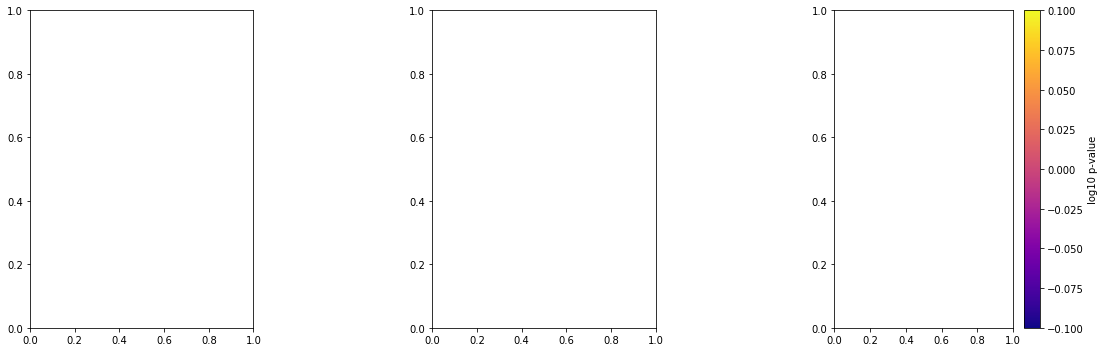

In [14]:
c2c.analysis.bar_go(f_cell)

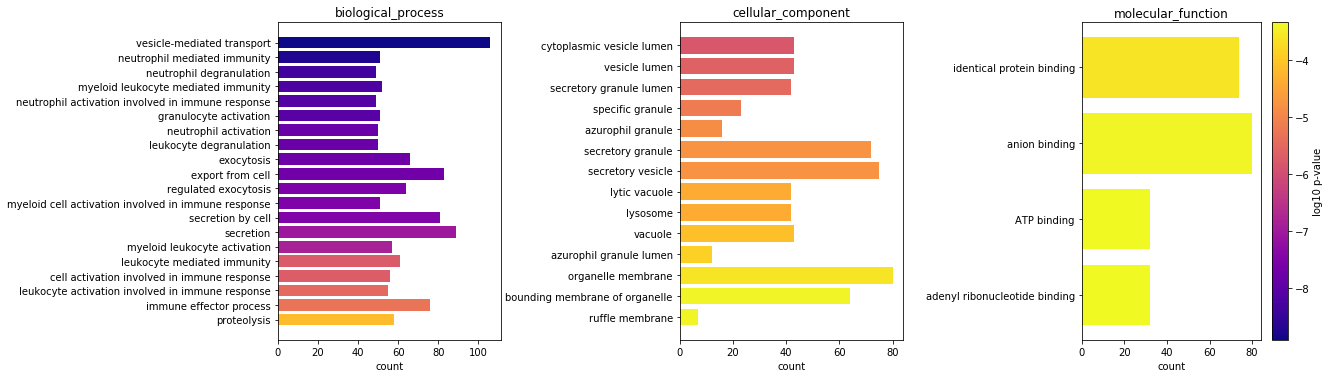

In [15]:
c2c.analysis.bar_go(s_cell) # neutrophil is such a lazy cell

## GO term layout by GOenrich package
here we show the calculation for cell 9 and cell 4's interacting protein
all protein on cell 4's side
![interating protein on cell4's side](4to9.png)
all protein on cell 9's side
![interating protein on cell9's side](9to4.png)

In [16]:
cell_8, cell_12 = c2c.analysis.enriched_interaction(mean_matrix, lookup_table, cell_one = 8, cell_two = 12)

/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (63814, 8)


/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (63814, 8)


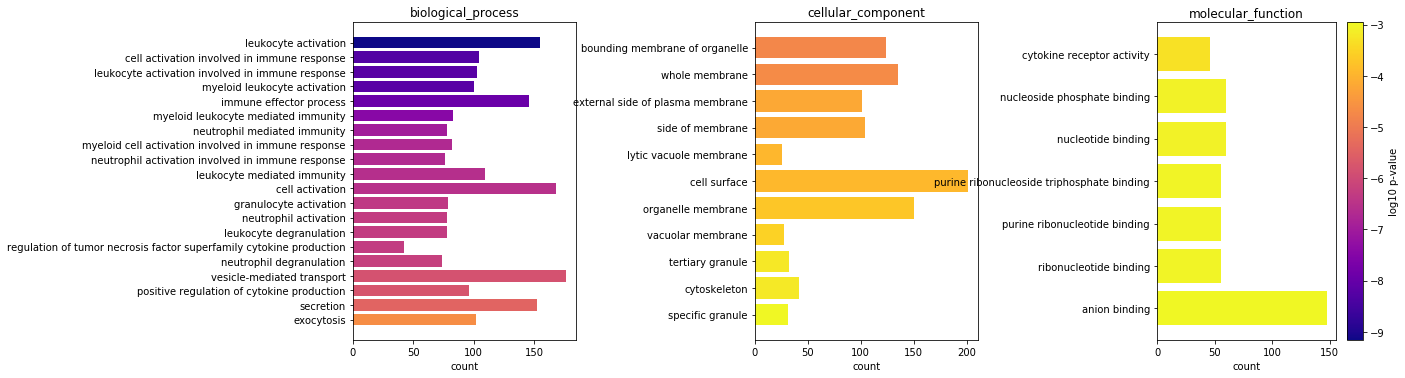

In [17]:
c2c.analysis.bar_go(cell_8)

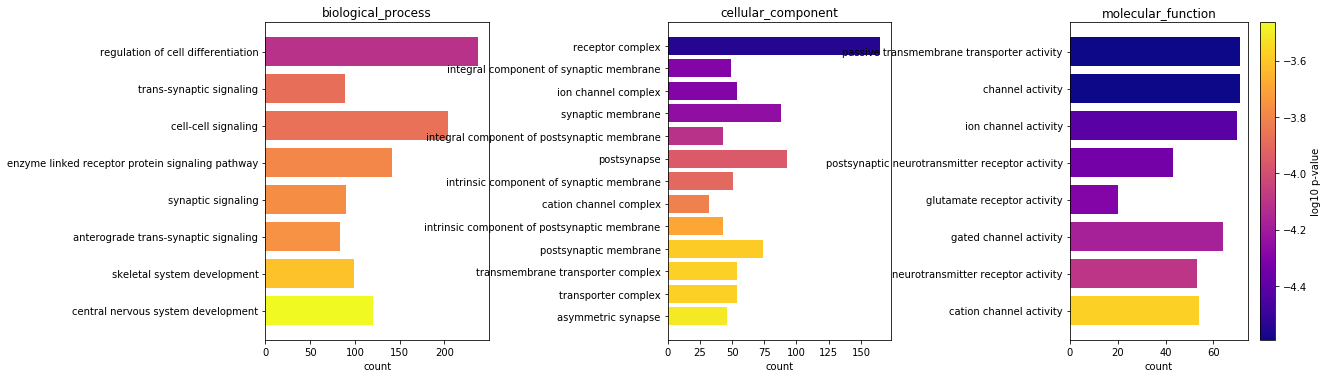

In [18]:
c2c.analysis.bar_go(cell_12)

## GO term layout by GOenrich package
here we show the calculation for cell 8 and cell 12's interacting protein
all protein on cell 8's side
![interating protein on cell4's side](8to12.png)
all protein on cell 12's side
![interating protein on cell9's side](12to8.png)

# Comparing Interaction from Different Cells

In [19]:
all_protein = c2c.analysis.all_pairs_interaction(mean_matrix)

In [23]:
x,p,n = c2c.analysis.go_enrich_by_cell(all_protein, mean_matrix, cell_id=8, lookup_table = lookup_table, cell_subset = [6,8,10,12])

/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


size of subset gene2go of gene2go is (56902, 8)
(31, 9)
size of subset gene2go of gene2go is (56902, 8)
(16, 9)
size of subset gene2go of gene2go is (56902, 8)
(45, 9)
size of subset gene2go of gene2go is (56902, 8)
(10, 9)
size of subset gene2go of gene2go is (59635, 8)
(81, 9)
size of subset gene2go of gene2go is (59635, 8)
(66, 9)
size of subset gene2go of gene2go is (59635, 8)
(64, 9)
size of subset gene2go of gene2go is (59635, 8)
(57, 9)


In [24]:
xlist, plist = c2c.analysis.partition_by_namespace(x,p,n)

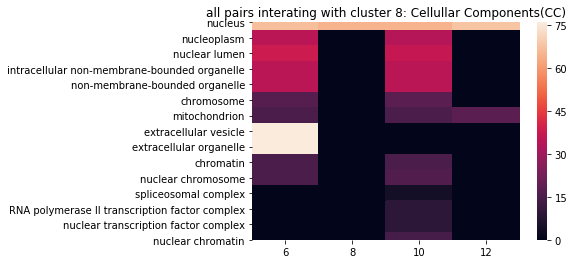

In [26]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('all pairs interating with cluster 8: Cellullar Components(CC)')
sns.heatmap(xlist[0])

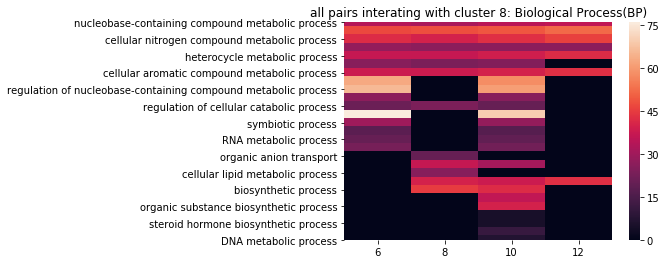

In [28]:
plt.title('all pairs interating with cluster 8: Biological Process(BP)')
sns.heatmap(xlist[1])

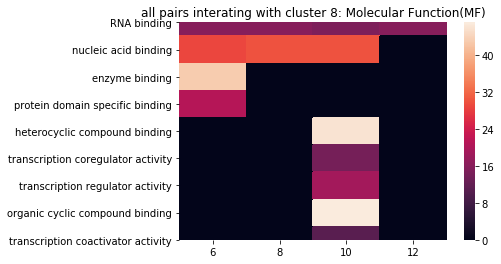

In [29]:
plt.title('all pairs interating with cluster 8: Molecular Function(MF)')
sns.heatmap(xlist[2])

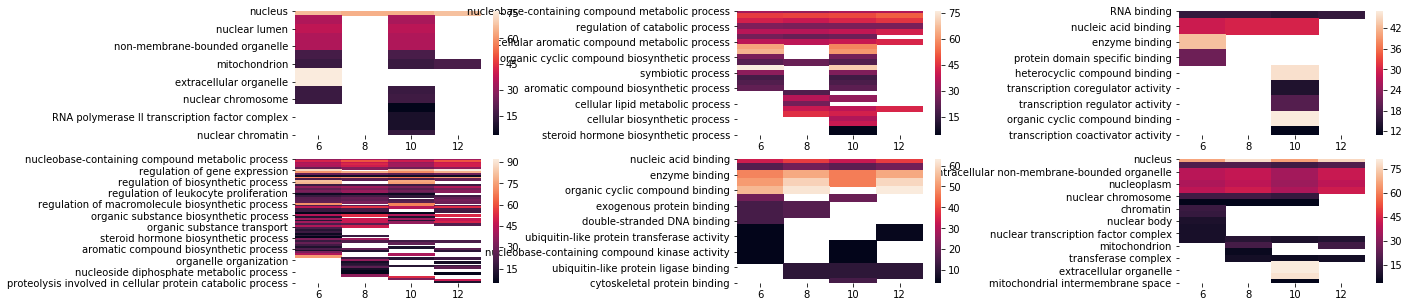

In [142]:
f, ax = plt.subplots(2, 3, squeeze = True, figsize = (20,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.9, hspace=None)
for i in range(6):
    sns.heatmap(xlist[i], ax = ax.flatten()[i])
    

# Outputting To R Reactome Enrichment Analysis
[See Another notebook]

In [37]:
# output to file for connect reactome enrichment analysic
cell_12_id = [c2c.analysis.symbol_to_entrezgene(i, lookup_table) for i in  all_protein[12,:,1]]

In [38]:
for partner in range(len(cell_12_id)):
    comma_sep = ','.join([str(i) for i in cell_12_id[partner]])
    
    with open('cell12_symbol2.txt', 'a') as f:
        f.write(comma_sep+'\n')
